In [72]:
import pandas as pd
import pickle
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet


In [2]:
# !pip install torch
# !pip install pyLDAvis
# !pip install ipywidgets
# !pip install transformers
!pip install lda2vec



In [3]:
# Define the path to the pickle file
pickle_file = 'processed_data.pkl'

# Read the data from the pickle file
with open(pickle_file, 'rb') as file:
    df = pickle.load(file)

In [4]:
# Define the path to the pickle file
pickle_file = 'test_processed_data.pkl'

# Read the data from the pickle file
with open(pickle_file, 'rb') as file:
    test_data = pickle.load(file)

In [5]:
df.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,TITLE_len,ABSTRACT_len,title,abstract
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0,4,265,"[reconstruct, effect, map]","[predictive, model, allow, inference, analyze,..."
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0,4,76,"[rotation, invariance, neural, network]","[rotation, invariance, translation, invariance..."
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0,8,99,"[spherical, polyharmonics, poisson, kernels, p...","[introduce, develop, notion, spherical, polyha..."
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0,9,110,"[finite, element, approximation, stochastic, m...","[stochastic, landau, lifshitz, gilbert, llg, e..."
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0,20,125,"[comparative, study, discrete, wavelet, transf...","[ftir, spectra, sample, 7, plant, species, use..."


In [6]:
df2 = df[['title', 'abstract']]  # Select the 'TITLE' and 'ABSTRACT' columns
df2.head()

,title,abstract
0,"[reconstruct, effect, map]","[predictive, model, allow, inference, analyze,..."
1,"[rotation, invariance, neural, network]","[rotation, invariance, translation, invariance..."
2,"[spherical, polyharmonics, poisson, kernels, p...","[introduce, develop, notion, spherical, polyha..."
3,"[finite, element, approximation, stochastic, m...","[stochastic, landau, lifshitz, gilbert, llg, e..."
4,"[comparative, study, discrete, wavelet, transf...","[ftir, spectra, sample, 7, plant, species, use..."


In [7]:
from gensim.corpora import Dictionary


# Convert the text column to a list of lists of tokens
documents = df2['abstract'].tolist()

# Create a dictionary and bag-of-words corpus using Gensim
dictionary = Dictionary(documents)
corpus = [dictionary.doc2bow(doc) for doc in documents]


Best Hyperparameters:
{'num_topics': 10, 'alpha': 'symmetric', 'eta': 0.5}
Best Coherence Score: 0.49719302574676155


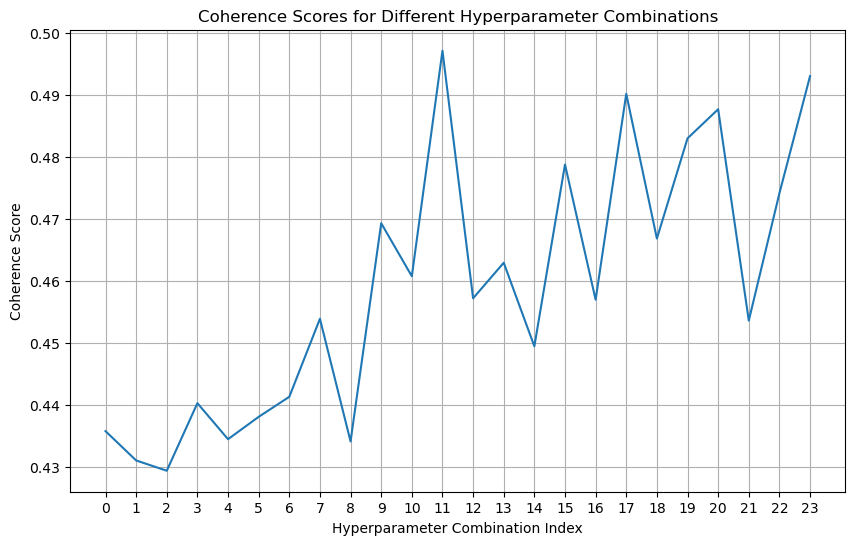

In [14]:
from gensim.models import CoherenceModel, LdaModel
import matplotlib.pyplot as plt

# Define the hyperparameters grid
hyperparameters_grid = {
    'num_topics': [5, 10, 15],  
    'alpha': ['symmetric', 'asymmetric'],  
    'eta': ['auto', 0.01, 0.1, 0.5]  
}

# Initialize variables to store the best model and its coherence score
best_coherence_score = -1
best_lda_model = None
best_hyperparameters = None

# Initialize lists to store coherence scores for plotting
coherence_scores = []
# Hyperparameter tuning
for num_topics in hyperparameters_grid['num_topics']:
    for alpha in hyperparameters_grid['alpha']:
        for eta in hyperparameters_grid['eta']:
            # Train LDA model
            lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10, alpha=alpha, eta=eta)
            
            # Compute coherence score
            coherence_model_lda = CoherenceModel(model=lda_model, texts=documents, dictionary=dictionary, coherence='c_v')
            coherence_score = coherence_model_lda.get_coherence()
            
            # Track best model
            if coherence_score > best_coherence_score:
                best_coherence_score = coherence_score
                best_lda_model = lda_model
                best_hyperparameters = {'num_topics': num_topics, 'alpha': alpha, 'eta': eta}
            
            # Store coherence score for plotting
            coherence_scores.append((num_topics, alpha, eta, coherence_score))

# Print best hyperparameters and coherence score
print("Best Hyperparameters:")
print(best_hyperparameters)
print("Best Coherence Score:", best_coherence_score)

# Plot coherence scores
num_topics_values, alpha_values, eta_values, coherence_values = zip(*coherence_scores)
plt.figure(figsize=(10, 6))
plt.plot(coherence_values)
plt.title("Coherence Scores for Different Hyperparameter Combinations")
plt.xlabel("Hyperparameter Combination Index")
plt.ylabel("Coherence Score")
plt.xticks(ticks=range(len(coherence_scores)), labels=range(len(coherence_scores)))
plt.grid(True)
plt.show()


In [15]:
# Use the best LDA model for further analysis
best_lda_model = LdaModel(corpus, num_topics=best_hyperparameters['num_topics'], id2word=dictionary, passes=10, alpha=best_hyperparameters['alpha'], eta=best_hyperparameters['eta'])

# Print the topics and their top words
for idx, topic in best_lda_model.print_topics(-1):
    print(f'Topic: {idx} \nWords: {topic}\n')


Topic: 0 
Words: 0.003*"bunch" + 0.002*"muon" + 0.002*"fermilab" + 0.002*"beam" + 0.002*"scintillator" + 0.001*"microfibers" + 0.001*"tl" + 0.001*"linac" + 0.001*"proton" + 0.001*"veto"

Topic: 1 
Words: 0.008*"state" + 0.007*"phase" + 0.007*"model" + 0.006*"field" + 0.006*"use" + 0.006*"show" + 0.005*"magnetic" + 0.005*"energy" + 0.005*"transition" + 0.005*"study"

Topic: 2 
Words: 0.011*"space" + 0.008*"result" + 0.007*"prove" + 0.007*"function" + 0.007*"show" + 0.007*"equations" + 0.007*"theory" + 0.007*"give" + 0.006*"paper" + 0.006*"equation"

Topic: 3 
Words: 0.021*"n" + 0.019*"graph" + 0.014*"k" + 0.014*"g" + 0.014*"x" + 0.011*"p" + 0.010*"f" + 0.010*"1" + 0.009*"group" + 0.009*"number"

Topic: 4 
Words: 0.012*"network" + 0.010*"data" + 0.010*"model" + 0.008*"use" + 0.006*"study" + 0.005*"information" + 0.005*"paper" + 0.005*"social" + 0.004*"provide" + 0.004*"analysis"

Topic: 5 
Words: 0.011*"use" + 0.009*"system" + 0.008*"control" + 0.008*"design" + 0.007*"network" + 0.007*"s

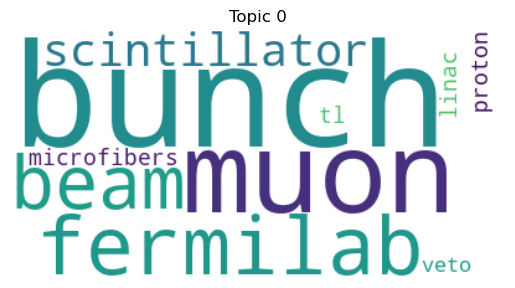

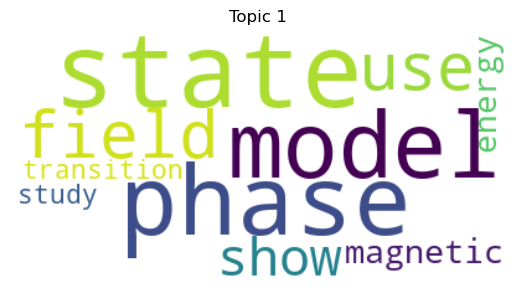

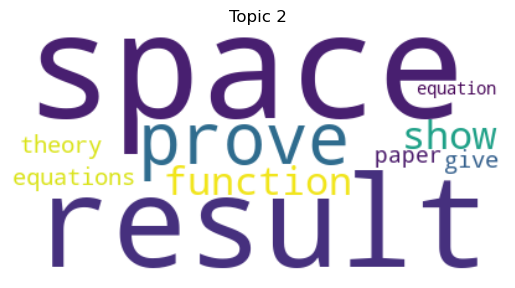

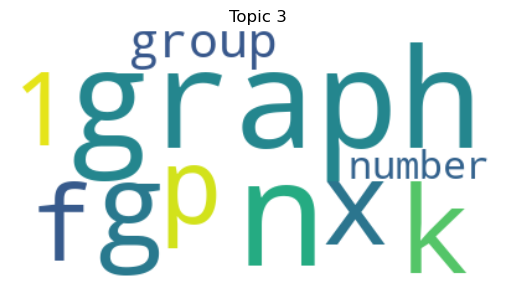

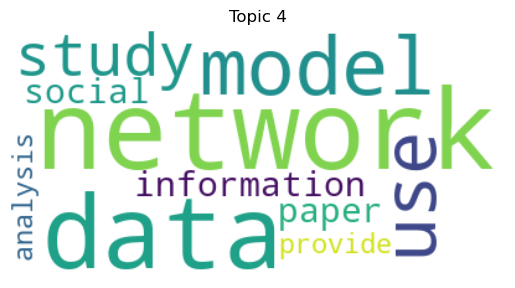

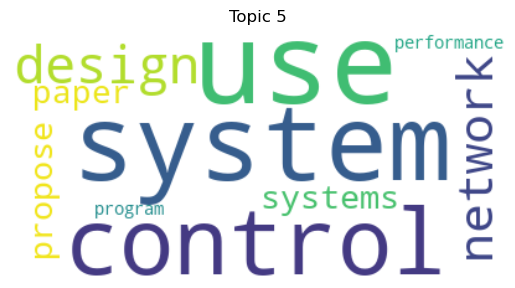

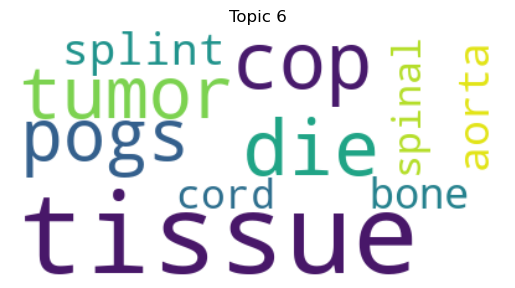

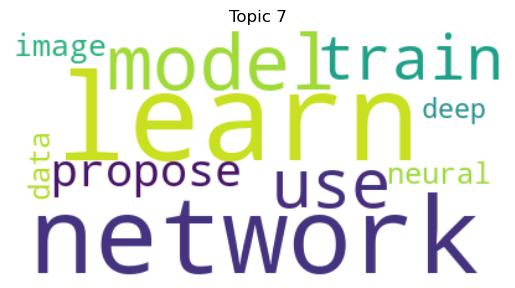

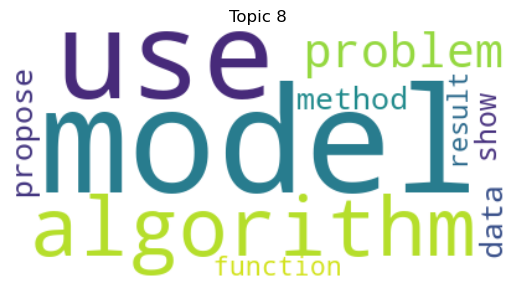

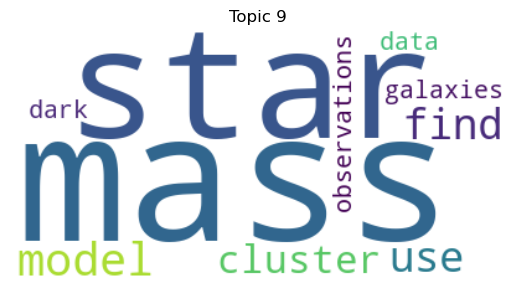

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds for each topic
for idx, topic in best_lda_model.show_topics(formatted=False):
    word_freq = {word: freq for word, freq in topic}
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_freq)
    
    # Plot word cloud
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {idx}')
    plt.axis('off')
    plt.show()


In [20]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Visualize the best LDA model
lda_display = gensimvis.prepare(best_lda_model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)


C:\Users\chewr\anaconda3\envs\nlp\Lib\site-packages\joblib\_utils.py:37: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
C:\Users\chewr\anaconda3\envs\nlp\Lib\site-packages\joblib\_utils.py:37: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
C:\Users\chewr\anaconda3\envs\nlp\Lib\site-packages\joblib\_utils.py:38: DeprecationWarning: Attribute n is deprecated and will be removed in Python 3.14; use value instead
  return node.n
C:\Users\chewr\anaconda3\envs\nlp\Lib\site-packages\joblib\_utils.py:37: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
C:\Users\chewr\anaconda3\envs\nlp\Lib\site-packages\joblib\_utils.py:38: DeprecationWarning: Attribute n is deprecated and will be removed in Python 3.

In [21]:
# Initialize an empty dictionary to store topic labels
topic_labels = {}

# Print the topics and their top words
for idx, topic in best_lda_model.print_topics(-1):
    # Extract the top words for each topic
    top_words = [word.split("*")[1].strip().strip('"') for word in topic.split("+")]
    
    # Combine the top words into a single label
    label = ", ".join(top_words)
    topic_labels[idx] = label

# Print the generated topic labels
for topic, label in topic_labels.items():
    print(f"Topic {topic}: {label}")


Topic 0: bunch, muon, fermilab, beam, scintillator, microfibers, tl, linac, proton, veto
Topic 1: state, phase, model, field, use, show, magnetic, energy, transition, study
Topic 2: space, result, prove, function, show, equations, theory, give, paper, equation
Topic 3: n, graph, k, g, x, p, f, 1, group, number
Topic 4: network, data, model, use, study, information, paper, social, provide, analysis
Topic 5: use, system, control, design, network, systems, propose, paper, performance, program
Topic 6: tissue, cop, die, tumor, pogs, splint, aorta, bone, cord, spinal
Topic 7: learn, network, model, use, train, propose, image, data, neural, deep
Topic 8: model, use, algorithm, problem, method, data, propose, show, result, function
Topic 9: mass, star, model, use, find, cluster, galaxies, data, observations, dark


In [77]:
import pickle

# File path where you want to save the model
model_filepath = "best_lda_model.pkl"

# Save the model to a file using pickle
with open(model_filepath, 'wb') as file:
    pickle.dump(best_lda_model, file)

print("LDA model saved successfully.")

LDA model saved successfully.


In [26]:
# Define labels for each topic based on the predominant themes suggested by the top words
topic_labels = {
    0: "Particle Physics",
    1: "Physics of Matter",
    2: "Mathematical Analysis",
    3: "Graph Theory",
    4: "Data Analysis and Social Networks",
    5: "Control Systems and Network Design",
    6: "Medical Imaging and Anatomy",
    7: "Machine Learning and Neural Networks",
    8: "Computational Methods and Algorithms",
    9: "Astrophysics and Cosmology"
}

# Print the assigned labels for each topic
for topic, label in topic_labels.items():
    print(f"Topic {topic}: {label}")


Topic 0: Particle Physics
Topic 1: Physics of Matter
Topic 2: Mathematical Analysis
Topic 3: Graph Theory
Topic 4: Data Analysis and Social Networks
Topic 5: Control Systems and Network Design
Topic 6: Medical Imaging and Anatomy
Topic 7: Machine Learning and Neural Networks
Topic 8: Computational Methods and Algorithms
Topic 9: Astrophysics and Cosmology


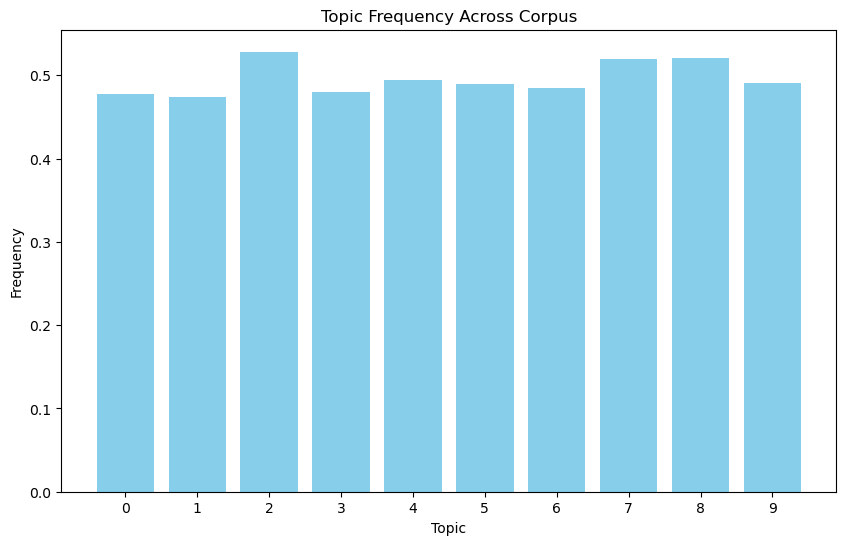

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming doc_topic_matrix contains the topic distribution for each document
# It should be a 2D numpy array where each row represents a document and each column represents a topic
# You can calculate this matrix using the lda_model[corpus] method in Gensim

# Example doc_topic_matrix (replace this with your actual data)
doc_topic_matrix = np.random.rand(100, 10)  # 100 documents, 10 topics

# Calculate the mean topic distribution across all documents
topic_freq = np.mean(doc_topic_matrix, axis=0)

# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(topic_freq)), topic_freq, color='skyblue')
plt.xlabel('Topic')
plt.ylabel('Frequency')
plt.title('Topic Frequency Across Corpus')
plt.xticks(range(len(topic_freq)))  # Set x-axis ticks to be the topic indices
plt.show()


In [37]:
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary

# Preprocess the text
new_text = "Neural Network"
tokens = simple_preprocess(new_text)

# Convert the tokens to a bag-of-words representation using the same dictionary
bow = dictionary.doc2bow(tokens)

# Infer topics for the new text
inferred_topics = best_lda_model.get_document_topics(bow)

# Print the inferred topics
print("Inferred Topics:")
for topic, prob in inferred_topics:
    print(f"Topic {topic}: {prob:.4f}")

# Evaluate the inferred topics using coherence scores or manual inspection
# coherence_model_lda = CoherenceModel(model=best_lda_model, texts=documents, dictionary=dictionary, coherence='c_v')
# coherence_score = coherence_model_lda.get_coherence()
# print("Coherence Score:", coherence_score)


Inferred Topics:
Topic 0: 0.0333
Topic 1: 0.0333
Topic 2: 0.0333
Topic 3: 0.0333
Topic 4: 0.0333
Topic 5: 0.0333
Topic 6: 0.0333
Topic 7: 0.7000
Topic 8: 0.0333
Topic 9: 0.0333


In [56]:
# Initialize an empty list to store the assigned topics
assigned_topics = []
data = df[['TITLE', 'ABSTRACT']]

# Iterate through each document (abstract)
for abstract in data['ABSTRACT']:
    # Convert the abstract into bag-of-words representation
    bow = dictionary.doc2bow(abstract.split())
    # Get the topic distribution for the abstract from the LDA model
    topic_distribution = best_lda_model.get_document_topics(bow)
    # Sort the topic distribution by probability and get the topic with the highest probability
    top_topic = max(topic_distribution, key=lambda item: item[1])[0]
    # Append the assigned topic to the list
    assigned_topics.append(top_topic)

# Assign the assigned topics to the dataset
data['Topic'] = assigned_topics

# Display the modified dataset with new topics
print(data)


                                                   TITLE  \
0            Reconstructing Subject-Specific Effect Maps   
1                     Rotation Invariance Neural Network   
2      Spherical polyharmonics and Poisson kernels fo...   
3      A finite element approximation for the stochas...   
4      Comparative study of Discrete Wavelet Transfor...   
...                                                  ...   
20967  Contemporary machine learning: a guide for pra...   
20968  Uniform diamond coatings on WC-Co hard alloy c...   
20969  Analysing Soccer Games with Clustering and Con...   
20970  On the Efficient Simulation of the Left-Tail o...   
20971   Why optional stopping is a problem for Bayesians   

                                                ABSTRACT  Topic  
0        Predictive models allow subject-specific inf...      7  
1        Rotation invariance and translation invarian...      7  
2        We introduce and develop the notion of spher...      2  
3        The st

C:\Users\chewr\AppData\Local\Temp\ipykernel_38648\1173292845.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Topic'] = assigned_topics


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['ABSTRACT'], data['Topic'], test_size=0.2, random_state=42)

# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train the classifier (Logistic Regression)
classifier = LogisticRegression()
classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = classifier.predict(X_test_tfidf)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Accuracy: 0.8696066746126341
              precision    recall  f1-score   support

           1       0.90      0.95      0.92       715
           2       0.82      0.91      0.86       633
           3       0.87      0.57      0.69       207
           4       0.86      0.84      0.85       510
           5       0.88      0.76      0.81       335
           6       0.00      0.00      0.00         5
           7       0.87      0.88      0.87       561
           8       0.86      0.91      0.88       966
           9       0.97      0.85      0.90       263

    accuracy                           0.87      4195
   macro avg       0.78      0.74      0.76      4195
weighted avg       0.87      0.87      0.87      4195



C:\Users\chewr\anaconda3\envs\nlp\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\chewr\anaconda3\envs\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chewr\anaconda3\envs\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-define

In [55]:
# Perform one-hot encoding for the 'Topic' column
encoded_topics = pd.get_dummies(data['Topic'], prefix='Topic')

# Concatenate the encoded topics with the original dataframe
data_encoded = pd.concat([data, encoded_topics], axis=1)

# Drop the original 'Topic' column
data_encoded.drop('Topic', axis=1, inplace=True)

# Display the modified dataset with one-hot encoded topics
print(data_encoded)

                                                   TITLE  \
0            Reconstructing Subject-Specific Effect Maps   
1                     Rotation Invariance Neural Network   
2      Spherical polyharmonics and Poisson kernels fo...   
3      A finite element approximation for the stochas...   
4      Comparative study of Discrete Wavelet Transfor...   
...                                                  ...   
20967  Contemporary machine learning: a guide for pra...   
20968  Uniform diamond coatings on WC-Co hard alloy c...   
20969  Analysing Soccer Games with Clustering and Con...   
20970  On the Efficient Simulation of the Left-Tail o...   
20971   Why optional stopping is a problem for Bayesians   

                                                ABSTRACT  Topic_0  Topic_1  \
0        Predictive models allow subject-specific inf...    False    False   
1        Rotation invariance and translation invarian...    False    False   
2        We introduce and develop the notion 